<a href="https://colab.research.google.com/github/skj092/Kaggle_Competition/blob/main/Paddy_disease_classificaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the Dataset

In [2]:
import os 

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [4]:
!touch kaggle.json

In [5]:
!chmod 600 /content/kaggle.json

In [6]:
!kaggle competitions download -c paddy-disease-classification

 98% 1.00G/1.02G [00:08<00:00, 90.4MB/s]
100% 1.02G/1.02G [00:08<00:00, 126MB/s] 


In [7]:
!mkdir input_data 

In [8]:
!unzip -q /content/paddy-disease-classification.zip -d input_data

# Importing the libraries

In [9]:
!pip install timm -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 22.8 MB/s eta 0:00:00


In [10]:
from fastai.vision.all import *
import timm 

In [11]:
path = Path('input_data')
path.ls()

(#4) [Path('input_data/train_images'),Path('input_data/test_images'),Path('input_data/train.csv'),Path('input_data/sample_submission.csv')]

In [12]:
train_path = path/'train_images'

In [13]:
dls = ImageDataLoaders.from_folder(train_path, valid_pct=0.2, item_tfms=Resize(224))

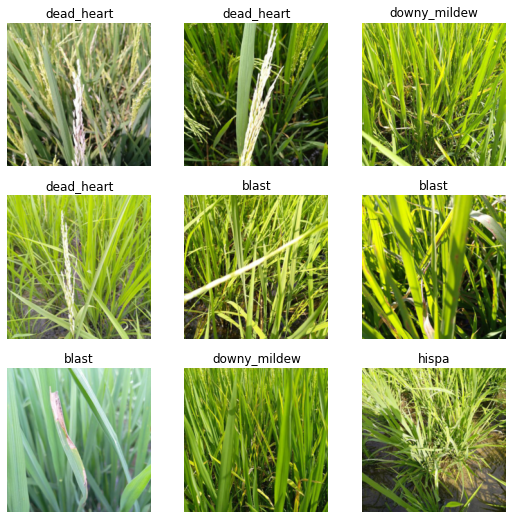

In [14]:
dls.show_batch()

In [15]:
xb, yb = dls.one_batch()
xb.shape, yb.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [19]:
learn = vision_learner(dls, 'convnext_small_in22ft1k', metrics=error_rate).to_fp16()

In [20]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.198285,0.563783,0.186929,01:37


epoch,train_loss,valid_loss,error_rate,time
0,0.583731,0.312196,0.103316,01:41
1,0.390614,0.218275,0.065834,01:43


SuggestedLRs(valley=1.737800812406931e-05)

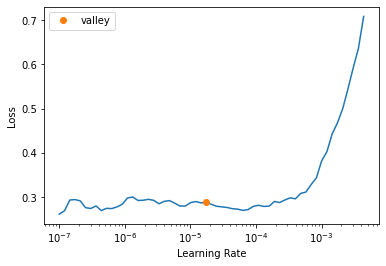

In [21]:
learn.lr_find()

# Inference

In [48]:
test_images = get_image_files(path/'test_images')
test_images.sort()

In [50]:
test_dl = dls.test_dl(test_items=test_images)

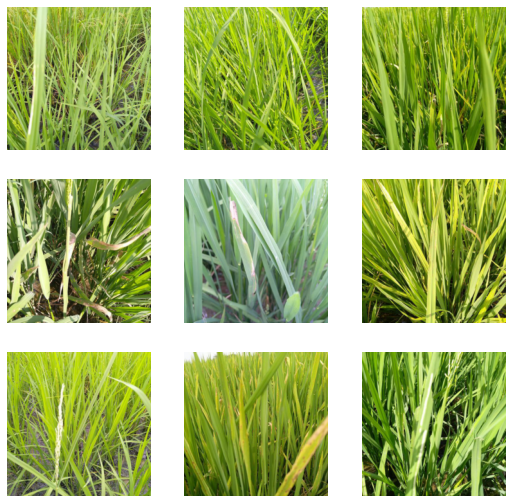

In [51]:
test_dl.show_batch()

In [52]:
preds = learn.get_preds(dl = test_dl, with_decoded=True)

In [53]:
probs, _, idxs = preds

In [54]:
idxs = pd.Series(idxs.numpy(), name='idxs')
idxs

0       7
1       8
2       6
3       3
4       3
       ..
3464    5
3465    7
3466    8
3467    1
3468    5
Name: idxs, Length: 3469, dtype: int64

In [55]:
mapping = {k:v for k,v in enumerate(dls.vocab)}
results = idxs.map(mapping)

In [56]:
ss = pd.read_csv(path/'sample_submission.csv')
ss.head()

,image_id,label
0,200001.jpg,NaN
1,200002.jpg,NaN
2,200003.jpg,NaN
3,200004.jpg,NaN
4,200005.jpg,NaN


In [57]:
ss['label'] = results

In [58]:
ss.to_csv('submission.csv', index=False)

In [59]:
!head submission.csv

image_id,label
200001.jpg,hispa
200002.jpg,normal
200003.jpg,downy_mildew
200004.jpg,blast
200005.jpg,blast
200006.jpg,brown_spot
200007.jpg,dead_heart
200008.jpg,brown_spot
200009.jpg,hispa


In [60]:
!kaggle competitions submit -c paddy-disease-classification -f /content/submission.csv -m "convxnet baseline fune tun 2 epoch"

100% 70.1k/70.1k [00:01<00:00, 47.1kB/s]
Successfully submitted to Paddy Doctor: Paddy Disease Classification